In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

#import necessary libraries for plotting

# Opening the generated dataset

In [2]:
mazeData = pd.read_csv('maze_data.csv')
mazeData.head()


,Algorithm,Cell_Type,Cell_Size,Processing_Time_BFS (ms),Nodes_Processed_BFS (%),Processing_Time_DFS (ms),Nodes_Processed_DFS (%),Processing_Time_UCS (ms),Nodes_Processed_UCS (%),Processing_Time_Greedy (ms),Nodes_Processed_Greedy (%),Processing_Time_AStar (ms),Nodes_Processed_AStar (%)
0,CellularAutomaton,Rectangle,3472,7.90,99.87,0.72,60.60,8.24,99.87,6.91,63.48,9.21,99.87
1,Kruskal,Rectangle,4608,6.72,80.36,0.53,45.72,7.14,80.36,4.55,47.09,7.65,79.99
2,Ellers,Rectangle,1440,6.35,73.48,0.26,21.20,6.66,73.48,2.13,22.45,6.53,67.10
3,Kruskal,Rectangle,2100,8.02,98.00,0.92,82.86,7.75,98.00,8.96,96.00,8.87,96.75
4,HuntAndKill,Rectangle,1092,7.25,82.24,1.04,61.60,8.71,82.24,7.48,63.48,8.41,79.86


# Generating relevant dataframes (BFS and DFS only)

In [16]:
timeBFS = pd.DataFrame(mazeData['Processing_Time_BFS (ms)'])  #dataframe of time solving the maze using BFS (ms)
nodeBFS = pd.DataFrame(mazeData['Nodes_Processed_BFS (%)'])   #dataframe of percentage of nodes processed using BFS (%)

timeDFS = pd.DataFrame(mazeData['Processing_Time_DFS (ms)'])  #dataframe of time solving the maze using DFS (ms)
nodeDFS = pd.DataFrame(mazeData['Nodes_Processed_DFS (%)'])   #dataframe of percentage of nodes processed using DFS (%)

BFS = pd.DataFrame(mazeData[['Processing_Time_BFS (ms)', 'Nodes_Processed_BFS (%)']]) #merging two columns of BFS
DFS = pd.DataFrame(mazeData[['Processing_Time_DFS (ms)', 'Nodes_Processed_DFS (%)']]) #merging two columns of DFS

# Removing outliers

In [17]:
#remove outliers functions
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out



BFS = remove_outliers(BFS,'Processing_Time_BFS (ms)')
DFS = remove_outliers(DFS,'Processing_Time_DFS (ms)')

# Basic statistics deriving from the dataset

<AxesSubplot:>

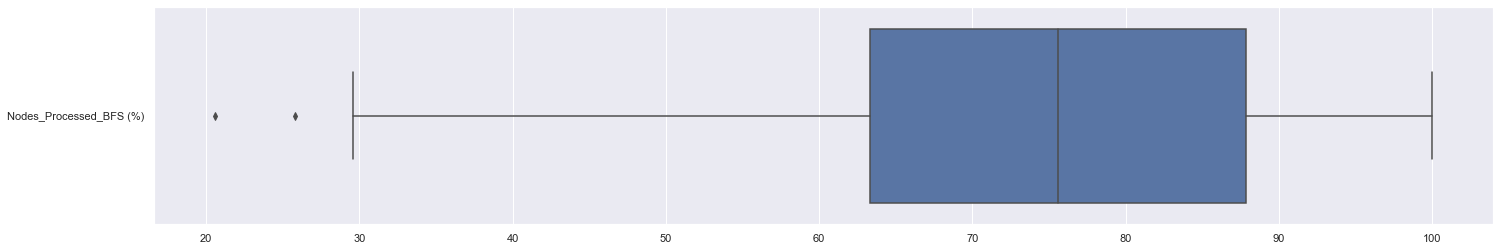

In [21]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = nodeBFS, orient = "h")
#boxplot representing the statistics of BFS's nodes% processed

<AxesSubplot:>

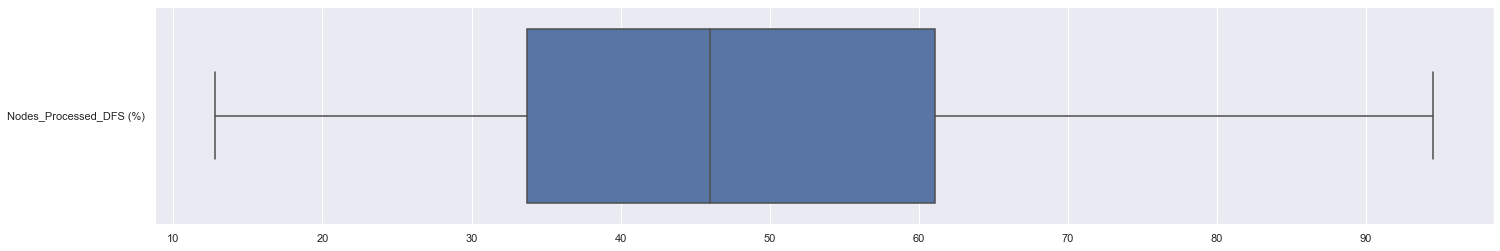

In [22]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = nodeDFS, orient = "h")
#boxplot representing the statistics of DFS's nodes% processed

<AxesSubplot:>

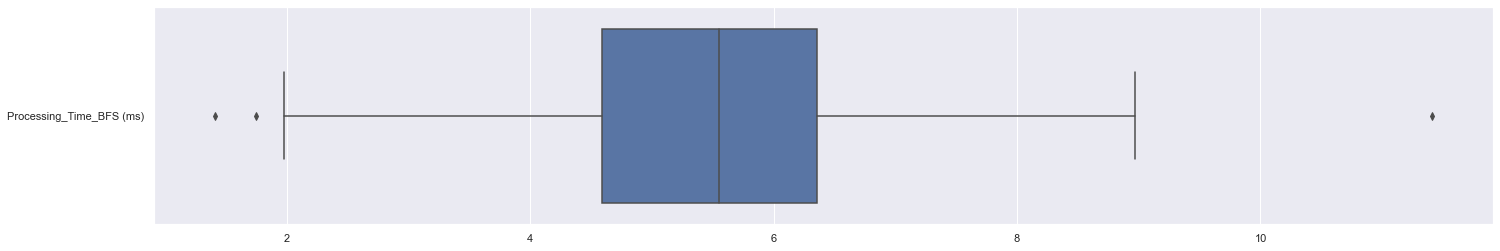

In [23]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = timeBFS, orient = "h")
#boxplot representing the statistics of BFS's processing time

<AxesSubplot:>

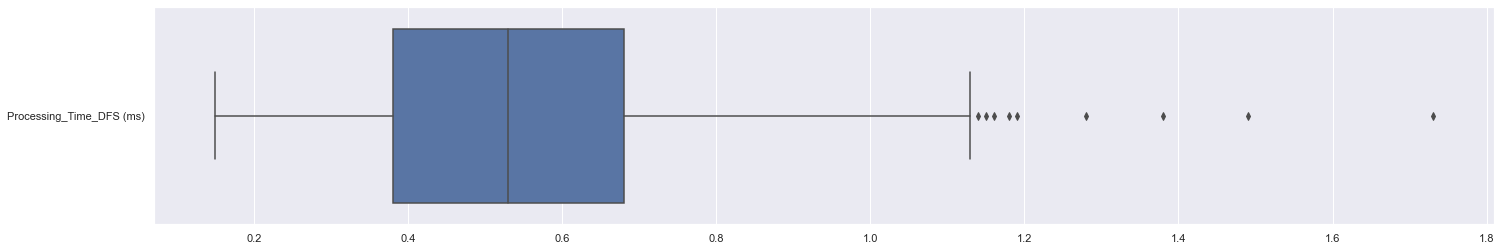

In [24]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = timeDFS, orient = "h")
#boxplot representing the statistics of BFS's processing time

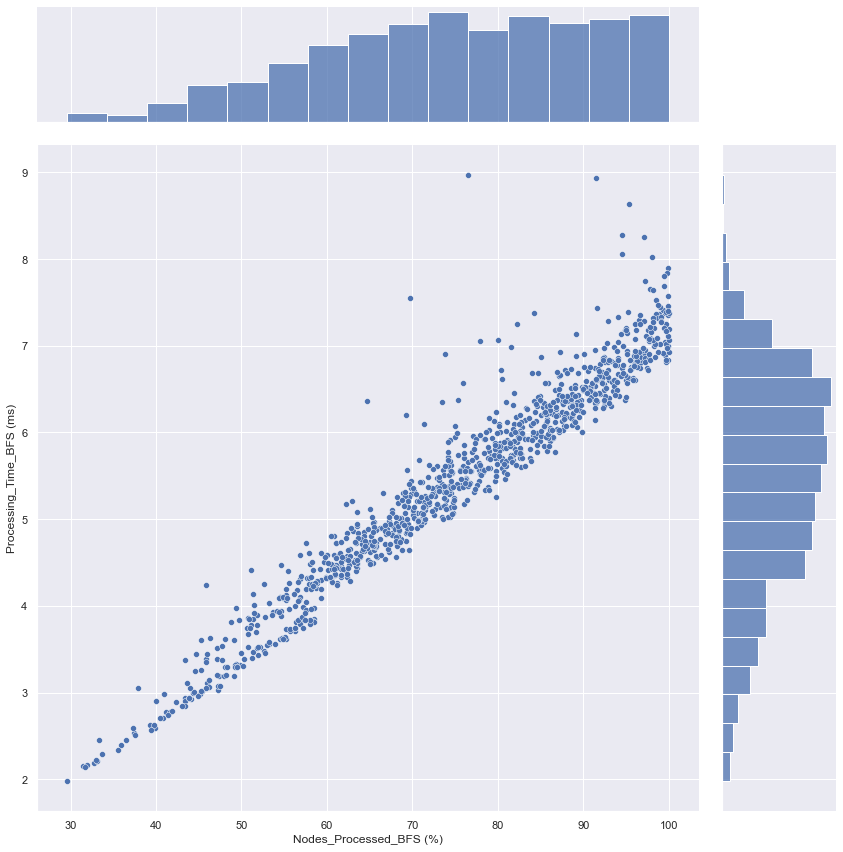

In [25]:
sb.jointplot(data =  BFS, x = "Nodes_Processed_BFS (%)", y = "Processing_Time_BFS (ms)", height = 12)

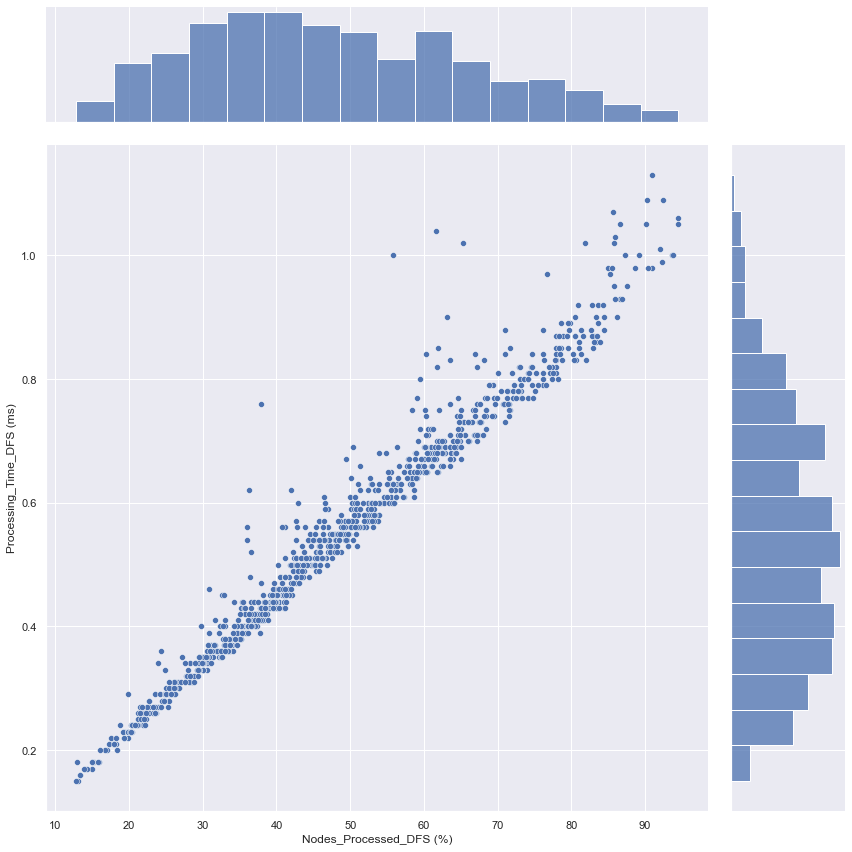

In [26]:
sb.jointplot(data = DFS, x = "Nodes_Processed_DFS (%)", y = "Processing_Time_DFS (ms)", height = 12)